# Business Understanding

El modelo esta orientado a poder determinar que usuarios son los mas vulnerables a cancelar su subscripcion. Al determinar cuales son los usuarios mas proables de realizar esto, se escoge esta data y se la pasaria a otro departamento ya se de marketing/ventas para poder decidir que realizar en base a el usuario ya sea un descuento o algo por parecido.

 En base a las tablas demostradas en el "Contexto" se podria realizar una hipotesis que los features que mas extiendan o que mas fidelizen al cliente son las que harian consecuentemente que el cliente se quede mas , esto ya seria como la duracion del contrato, el tipo del contrato( que no sea indefinido), metodos de pagos eficientes. Por otra parte se genera tambien la hipotesis de que si un cliente tiene mas de un servicio contratado estos serian los menos probables en irse ya que tendria que cancelar dos servicios con dos contratos diferentes comparado a los clientes que son mas probables en irse en donde solo tienen que cancelar uno. 

Los KPIs utilizados van a ser AUC, para poder distinguir apropiadamente entre churn y no churn. Por otra mano como segundo indice de desempeño se va a utilizar el  F1-score para poder tambien analizar y no malgastar descuentos en clientes que no se van a ir.

# Data Understanding

In [1067]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1068]:
path= r'C:\DataMining\ExamenFinal\data\raw'

contract_df= pd.read_csv(path + r'\contract.csv')
internet_df= pd.read_csv(path + r'\internet.csv')
personal_df=pd.read_csv(path + r'\personal.csv')
phone_df=pd.read_csv(path+ r'\phone.csv')


In [1069]:
contract_df.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [1070]:
import seaborn as sns

Type
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


C:\Users\elian\AppData\Local\Temp\ipykernel_6332\2146451691.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contract_counts.index, y=contract_counts.values, palette='viridis')


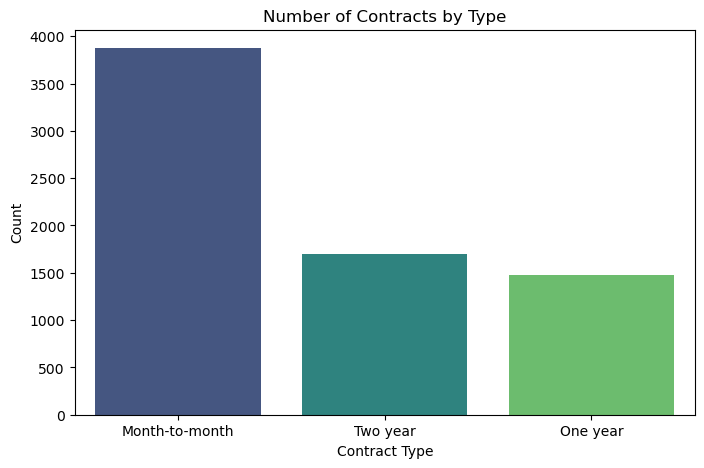

In [1071]:
contract_counts = contract_df['Type'].value_counts()

print(contract_counts)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=contract_counts.index, y=contract_counts.values, palette='viridis')
plt.title('Number of Contracts by Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

In [1072]:
personal_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


C:\Users\elian\AppData\Local\Temp\ipykernel_6332\2740069420.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='mako')


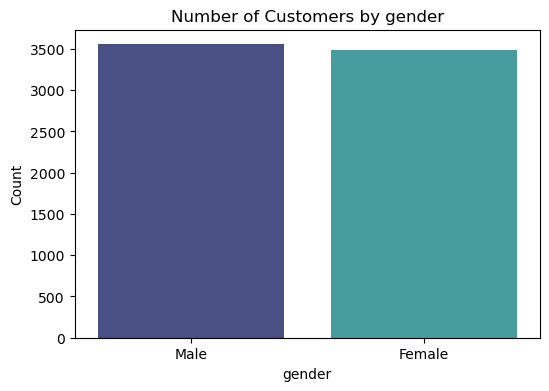

C:\Users\elian\AppData\Local\Temp\ipykernel_6332\2740069420.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='mako')


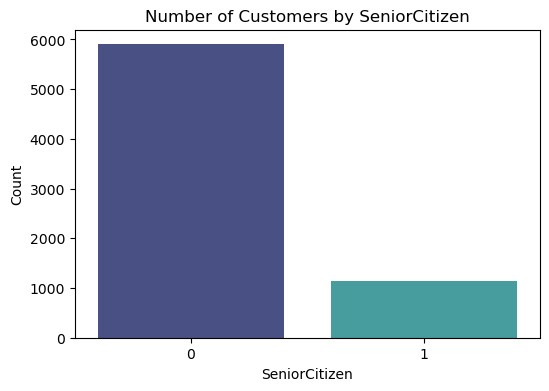

C:\Users\elian\AppData\Local\Temp\ipykernel_6332\2740069420.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='mako')


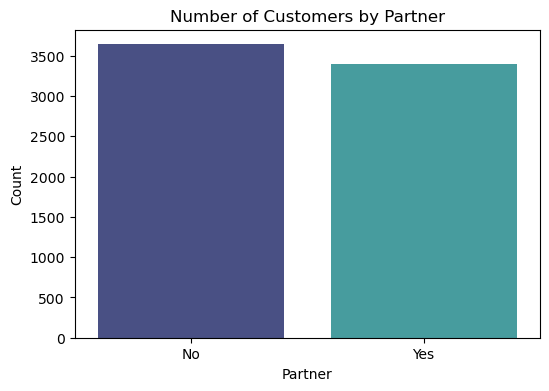

C:\Users\elian\AppData\Local\Temp\ipykernel_6332\2740069420.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='mako')


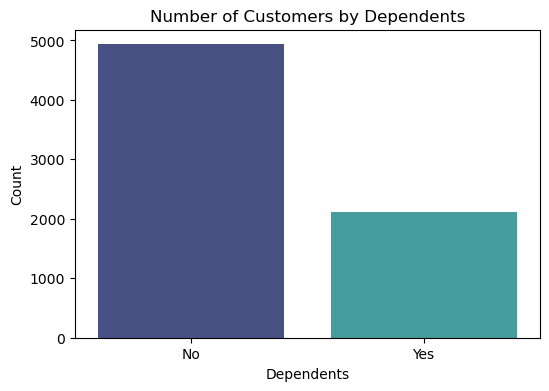

In [1073]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for col in columns:
    counts = personal_df[col].value_counts()
    plt.figure(figsize=(6,4))
    sns.barplot(x=counts.index.astype(str), y=counts.values, palette='mako')
    plt.title(f'Number of Customers by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In [1074]:
internet_df.head(5)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


C:\Users\elian\AppData\Local\Temp\ipykernel_6332\87513477.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=internet_counts.index, y=internet_counts.values, palette='viridis')


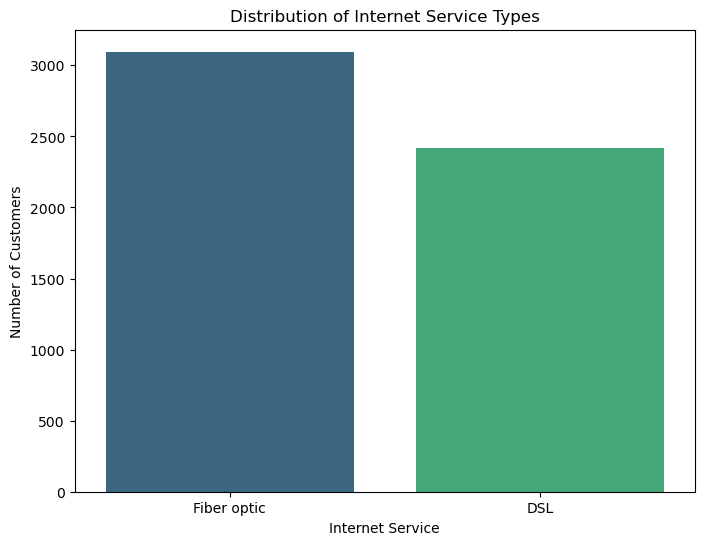

In [1075]:
internet_counts = internet_df['InternetService'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=internet_counts.index, y=internet_counts.values, palette='viridis')
plt.title('Distribution of Internet Service Types')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.show()

In [1076]:
phone_df.head(5)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


C:\Users\elian\AppData\Local\Temp\ipykernel_6332\3288123132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=multiple_lines_counts.index, y=multiple_lines_counts.values, palette='viridis')


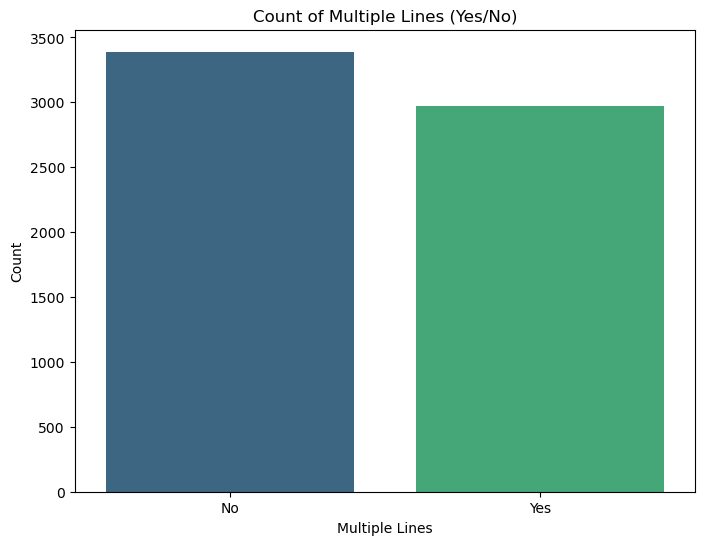

In [ ]:
multiple_lines_counts = phone_df['MultipleLines'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=multiple_lines_counts.index, y=multiple_lines_counts.values, palette='viridis')
plt.title('Count of Multiple Lines (Yes/No)')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')
plt.show()


Como podemos observar la data especifca atributos especificos de cada elemento involucrado en la empresa de Interconnect. Es importante denotar que la data caracteriza tipo de contrato con numerables caracteristicas, tipo de usuario y si tiene relacion conyugal e hijos, caracteristicas del servicio de internet especificas de esta, y en la tabla de telefono solamente si es que existe multiples lineas del servicio.

Existe un entendimiento en cuanto que tiene cada tabla, como lo clasifica binariamente (Si,no), o con muchas clasificaciones por ejemplo: ("Internet_service"). Servicios estan entrelazados mediante el ID del usuario por lo cual se va a tener que utilizar este valor para poder agrupar y calcular servicios y caracteristicas en base al usuario para posteriormente predecir el churn

# Data Preparation

In [1078]:
def initialExploration(df):
    print(30*'='+'First 10 rows'+'='*30)
    print(df.head(10))
    print(30*'='+'Last 10 rows'+'='*30)
    print(df.tail(10))
    print(30*'='+'Info'+'='*30)
    print(df.info())
    print(30*'='+'Nulls'+'='*30)
    print(df.isnull().sum())
    print(30*'='+'Duplicates'+'='*30)
    print(df.duplicated().sum())

In [1079]:
initialExploration(contract_df)

==============================First 10 rows==============================
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   
5  9305-CDSKC  2019-03-01  2019-11-01 00:00:00  Month-to-month   
6  1452-KIOVK  2018-04-01                   No  Month-to-month   
7  6713-OKOMC  2019-04-01                   No  Month-to-month   
8  7892-POOKP  2017-07-01  2019-11-01 00:00:00  Month-to-month   
9  6388-TABGU  2014-12-01                   No        One year   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check

In [1080]:
initialExploration(internet_df)

==============================First 10 rows==============================
   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   
5  9305-CDSKC     Fiber optic             No           No              Yes   
6  1452-KIOVK     Fiber optic             No          Yes               No   
7  6713-OKOMC             DSL            Yes           No               No   
8  7892-POOKP     Fiber optic             No           No              Yes   
9  6388-TABGU             DSL            Yes          Yes               No   

  TechSupport StreamingTV StreamingMovies  
0          No          

In [1081]:
initialExploration(personal_df)

==============================First 10 rows==============================
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No
5  9305-CDSKC  Female              0      No         No
6  1452-KIOVK    Male              0      No        Yes
7  6713-OKOMC  Female              0      No         No
8  7892-POOKP  Female              0     Yes         No
9  6388-TABGU    Male              0      No        Yes
==============================Last 10 rows==============================
      customerID  gender  SeniorCitizen Partner Dependents
7033  9767-FFLEM    Male              0      No         No
7034  0639-TSIQW  Female              0      No         No
7035  8456-QDAVC    Male              0      No         No
7

In [1082]:
initialExploration(phone_df)

==============================First 10 rows==============================
   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes
5  7892-POOKP           Yes
6  6388-TABGU            No
7  9763-GRSKD            No
8  7469-LKBCI            No
9  8091-TTVAX           Yes
==============================Last 10 rows==============================
      customerID MultipleLines
6351  3605-JISKB           Yes
6352  6894-LFHLY           Yes
6353  9767-FFLEM            No
6354  0639-TSIQW           Yes
6355  8456-QDAVC            No
6356  2569-WGERO            No
6357  6840-RESVB           Yes
6358  2234-XADUH           Yes
6359  8361-LTMKD           Yes
6360  3186-AJIEK            No
==============================Info==============================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Coun

No duplicates

In [1083]:
contract_df


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [1084]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [1085]:
contract_df['TotalCharges'] = contract_df['TotalCharges'].replace(' ', '0')

contract_df['TotalCharges'] = contract_df['TotalCharges'].astype('float64')


In [1086]:
contract_df.value_counts('PaperlessBilling')
contract_df.value_counts('PaymentMethod')

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [1087]:
contract_df['BeginDate']= pd.to_datetime(contract_df['BeginDate'], format='%Y-%m-%d')
contract_df['EndDate'] = pd.to_datetime(contract_df['EndDate'], errors='coerce')

C:\Users\elian\AppData\Local\Temp\ipykernel_6332\4013246851.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  contract_df['EndDate'] = pd.to_datetime(contract_df['EndDate'], errors='coerce')


One Hot encoding

In [1088]:
#columna type
type_dummies = pd.get_dummies(contract_df['Type'], prefix='Type', drop_first=True)
contract_df = pd.concat([contract_df, type_dummies], axis=1)

In [1089]:
#columna payment method
payment_dummies = pd.get_dummies(contract_df['PaymentMethod'], prefix='PaymentMethod', drop_first=True)
contract_df = pd.concat([contract_df, payment_dummies], axis=1)

In [1090]:
#columna paperless billing
billing_dummies = pd.get_dummies(contract_df['PaperlessBilling'], prefix='PaperlessBilling', drop_first=True)
contract_df = pd.concat([contract_df, billing_dummies], axis=1)

In [1091]:
# convertir en binario
bool_cols = contract_df.select_dtypes(include='bool').columns
contract_df[bool_cols] = contract_df[bool_cols].astype(int)


In [1092]:
#eliminar columnas para modelaje
contract_ml=contract_df
contract_ml.drop(['Type', 'PaymentMethod', 'PaperlessBilling'], axis=1, inplace=True)


In [1093]:
contract_ml

,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_Yes
0,7590-VHVEG,2020-01-01,NaT,29.85,29.85,0,0,0,1,0,1
1,5575-GNVDE,2017-04-01,NaT,56.95,1889.50,1,0,0,0,1,0
2,3668-QPYBK,2019-10-01,2019-12-01,53.85,108.15,0,0,0,0,1,1
3,7795-CFOCW,2016-05-01,NaT,42.30,1840.75,1,0,0,0,0,0
4,9237-HQITU,2019-09-01,2019-11-01,70.70,151.65,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,84.80,1990.50,1,0,0,0,1,1
7039,2234-XADUH,2014-02-01,NaT,103.20,7362.90,1,0,1,0,0,1
7040,4801-JZAZL,2019-03-01,NaT,29.60,346.45,0,0,0,1,0,1
7041,8361-LTMKD,2019-07-01,2019-11-01,74.40,306.60,0,0,0,0,1,1


In [1094]:
internet_df

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [1095]:
columns_to_encode = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
internet_df_encoded = pd.get_dummies(internet_df[columns_to_encode], drop_first=True)
internet_df = pd.concat([internet_df, internet_df_encoded], axis=1)
internet_df.drop(columns=columns_to_encode, axis=1, inplace=True)

In [1096]:
columns_to_convert = [
    'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 
    'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'
]
internet_df[columns_to_convert] = internet_df[columns_to_convert].astype(int)

In [1097]:
internet_ml=internet_df
internet_ml

,customerID,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,7590-VHVEG,0,0,1,0,0,0,0
1,5575-GNVDE,0,1,0,1,0,0,0
2,3668-QPYBK,0,1,1,0,0,0,0
3,7795-CFOCW,0,1,0,1,1,0,0
4,9237-HQITU,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,0,1,0,1,1,1,1
5513,2234-XADUH,1,0,1,1,0,1,1
5514,4801-JZAZL,0,1,0,0,0,0,0
5515,8361-LTMKD,1,0,0,0,0,0,0


In [1098]:
personal_df

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [1099]:
# one hot encode
personal_dummies = pd.get_dummies(personal_df[['gender', 'Partner', 'Dependents']], drop_first=True)
personal_df = pd.concat([personal_df, personal_dummies], axis=1)


In [1100]:
personal_df

,customerID,gender,SeniorCitizen,Partner,Dependents,gender_Male,Partner_Yes,Dependents_Yes
0,7590-VHVEG,Female,0,Yes,No,False,True,False
1,5575-GNVDE,Male,0,No,No,True,False,False
2,3668-QPYBK,Male,0,No,No,True,False,False
3,7795-CFOCW,Male,0,No,No,True,False,False
4,9237-HQITU,Female,0,No,No,False,False,False
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,True,True,True
7039,2234-XADUH,Female,0,Yes,Yes,False,True,True
7040,4801-JZAZL,Female,0,Yes,Yes,False,True,True
7041,8361-LTMKD,Male,1,Yes,No,True,True,False


In [1101]:
# convertir en binario
personal_df[['gender_Male', 'Partner_Yes', 'Dependents_Yes']] = personal_df[['gender_Male', 'Partner_Yes', 'Dependents_Yes']].astype(int)


In [1102]:
# eliminar columnas para modelaje
personal_ml = personal_df[['customerID', 'SeniorCitizen', 'gender_Male', 'Partner_Yes', 'Dependents_Yes']]


In [1103]:

personal_ml

,customerID,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes
0,7590-VHVEG,0,0,1,0
1,5575-GNVDE,0,1,0,0
2,3668-QPYBK,0,1,0,0
3,7795-CFOCW,0,1,0,0
4,9237-HQITU,0,0,0,0
...,...,...,...,...,...
7038,6840-RESVB,0,1,1,1
7039,2234-XADUH,0,0,1,1
7040,4801-JZAZL,0,0,1,1
7041,8361-LTMKD,1,1,1,0


In [1104]:
phone_df

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [1105]:
phone_dummies = pd.get_dummies(phone_df['MultipleLines'], prefix='MultipleLines', drop_first=True)

phone_df = pd.concat([phone_df, phone_dummies], axis=1)

phone_df.drop('MultipleLines', axis=1, inplace=True)

In [1106]:
phone_df

,customerID,MultipleLines_Yes
0,5575-GNVDE,False
1,3668-QPYBK,False
2,9237-HQITU,False
3,9305-CDSKC,True
4,1452-KIOVK,True
...,...,...
6356,2569-WGERO,False
6357,6840-RESVB,True
6358,2234-XADUH,True
6359,8361-LTMKD,True


In [1107]:
#binario
phone_df['MultipleLines_Yes'] = phone_df['MultipleLines_Yes'].astype(int)

In [1108]:
phone_ml=phone_df

In [1109]:
phone_ml

,customerID,MultipleLines_Yes
0,5575-GNVDE,0
1,3668-QPYBK,0
2,9237-HQITU,0
3,9305-CDSKC,1
4,1452-KIOVK,1
...,...,...
6356,2569-WGERO,0
6357,6840-RESVB,1
6358,2234-XADUH,1
6359,8361-LTMKD,1


Merge Data

In [1110]:
# Merging the DataFrames based on 'customerID'
user_df = contract_ml.merge(internet_ml, on='customerID', how='left') \
                       .merge(personal_ml, on='customerID', how='left') \
                       .merge(phone_ml, on='customerID', how='left')


In [1111]:
user_df

,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes
0,7590-VHVEG,2020-01-01,NaT,29.85,29.85,0,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,0,0,1,0,NaN
1,5575-GNVDE,2017-04-01,NaT,56.95,1889.50,1,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0.0
2,3668-QPYBK,2019-10-01,2019-12-01,53.85,108.15,0,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0,1,0,0,0.0
3,7795-CFOCW,2016-05-01,NaT,42.30,1840.75,1,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0,1,0,0,NaN
4,9237-HQITU,2019-09-01,2019-11-01,70.70,151.65,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,84.80,1990.50,1,0,0,0,1,...,0.0,1.0,1.0,1.0,1.0,0,1,1,1,1.0
7039,2234-XADUH,2014-02-01,NaT,103.20,7362.90,1,0,1,0,0,...,1.0,1.0,0.0,1.0,1.0,0,0,1,1,1.0
7040,4801-JZAZL,2019-03-01,NaT,29.60,346.45,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,1,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01,74.40,306.60,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1,1,1,0,1.0


In [1112]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   customerID                             7043 non-null   object        
 1   BeginDate                              7043 non-null   datetime64[ns]
 2   EndDate                                1869 non-null   datetime64[ns]
 3   MonthlyCharges                         7043 non-null   float64       
 4   TotalCharges                           7043 non-null   float64       
 5   Type_One year                          7043 non-null   int32         
 6   Type_Two year                          7043 non-null   int32         
 7   PaymentMethod_Credit card (automatic)  7043 non-null   int32         
 8   PaymentMethod_Electronic check         7043 non-null   int32         
 9   PaymentMethod_Mailed check             7043 non-null   int32   

In [1113]:
null_columns = user_df.isnull().sum()
null_columns[null_columns > 0]


EndDate                        5174
InternetService_Fiber optic    1526
OnlineSecurity_Yes             1526
OnlineBackup_Yes               1526
DeviceProtection_Yes           1526
TechSupport_Yes                1526
StreamingTV_Yes                1526
StreamingMovies_Yes            1526
MultipleLines_Yes               682
dtype: int64

In [1114]:
user_df = user_df.fillna(0)

In [1115]:
user_df

,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes
0,7590-VHVEG,2020-01-01,0,29.85,29.85,0,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0.0
1,5575-GNVDE,2017-04-01,0,56.95,1889.50,1,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0.0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,53.85,108.15,0,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0,1,0,0,0.0
3,7795-CFOCW,2016-05-01,0,42.30,1840.75,1,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0,1,0,0,0.0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,70.70,151.65,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,0,84.80,1990.50,1,0,0,0,1,...,0.0,1.0,1.0,1.0,1.0,0,1,1,1,1.0
7039,2234-XADUH,2014-02-01,0,103.20,7362.90,1,0,1,0,0,...,1.0,1.0,0.0,1.0,1.0,0,0,1,1,1.0
7040,4801-JZAZL,2019-03-01,0,29.60,346.45,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0.0
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,74.40,306.60,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1,1,1,0,1.0


In [1116]:
null_columns = user_df.isnull().sum()
null_columns[null_columns > 0]

Series([], dtype: int64)

Agregar CHURN en 1 año

In [1117]:
import pandas as pd

user_df['BeginDate'] = pd.to_datetime(user_df['BeginDate'])
user_df['EndDate'] = pd.to_datetime(user_df['EndDate'], errors='coerce')  

user_df['today'] = pd.to_datetime('today')
user_df['tenure_months'] = ((user_df['today'] - user_df['BeginDate']).dt.days / 30.44).astype(int)

user_df['churn_next_12mo'] = 0

user_df.loc[
    (user_df['EndDate'].notna()) & 
    (((user_df['EndDate'] - user_df['BeginDate']).dt.days / 30.44) <= 12),
    'churn_next_12mo'
] = 1


In [1118]:
user_df

,customerID,BeginDate,EndDate,MonthlyCharges,TotalCharges,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,StreamingTV_Yes,StreamingMovies_Yes,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes,today,tenure_months,churn_next_12mo
0,7590-VHVEG,2020-01-01,1970-01-01,29.85,29.85,0,0,0,1,0,...,0.0,0.0,0,0,1,0,0.0,2025-05-12 12:19:09.884664,64,1
1,5575-GNVDE,2017-04-01,1970-01-01,56.95,1889.50,1,0,0,0,1,...,0.0,0.0,0,1,0,0,0.0,2025-05-12 12:19:09.884664,97,1
2,3668-QPYBK,2019-10-01,2019-12-01,53.85,108.15,0,0,0,0,1,...,0.0,0.0,0,1,0,0,0.0,2025-05-12 12:19:09.884664,67,1
3,7795-CFOCW,2016-05-01,1970-01-01,42.30,1840.75,1,0,0,0,0,...,0.0,0.0,0,1,0,0,0.0,2025-05-12 12:19:09.884664,108,1
4,9237-HQITU,2019-09-01,2019-11-01,70.70,151.65,0,0,0,1,0,...,0.0,0.0,0,0,0,0,0.0,2025-05-12 12:19:09.884664,68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,1970-01-01,84.80,1990.50,1,0,0,0,1,...,1.0,1.0,0,1,1,1,1.0,2025-05-12 12:19:09.884664,87,1
7039,2234-XADUH,2014-02-01,1970-01-01,103.20,7362.90,1,0,1,0,0,...,1.0,1.0,0,0,1,1,1.0,2025-05-12 12:19:09.884664,135,1
7040,4801-JZAZL,2019-03-01,1970-01-01,29.60,346.45,0,0,0,1,0,...,0.0,0.0,0,0,1,1,0.0,2025-05-12 12:19:09.884664,74,1
7041,8361-LTMKD,2019-07-01,2019-11-01,74.40,306.60,0,0,0,0,1,...,0.0,0.0,1,1,1,0,1.0,2025-05-12 12:19:09.884664,70,1


In [1119]:
user_df.value_counts('churn_next_12mo')

churn_next_12mo
1    6211
0     832
Name: count, dtype: int64

Va a haber que balancear en los modelos posteriormente

In [1120]:
user_df.drop(columns=['BeginDate', 'EndDate', 'today', 'customerID'], axis=1, inplace=True)


In [1121]:
user_ml = user_df[user_df['tenure_months'] >= 12]
user_ml

,MonthlyCharges,TotalCharges,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes,tenure_months,churn_next_12mo
0,29.85,29.85,0,0,0,1,0,1,0.0,0.0,...,0.0,0.0,0.0,0,0,1,0,0.0,64,1
1,56.95,1889.50,1,0,0,0,1,0,0.0,1.0,...,0.0,0.0,0.0,0,1,0,0,0.0,97,1
2,53.85,108.15,0,0,0,0,1,1,0.0,1.0,...,0.0,0.0,0.0,0,1,0,0,0.0,67,1
3,42.30,1840.75,1,0,0,0,0,0,0.0,1.0,...,1.0,0.0,0.0,0,1,0,0,0.0,108,1
4,70.70,151.65,0,0,0,1,0,1,1.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0.0,68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,1,0,0,0,1,1,0.0,1.0,...,1.0,1.0,1.0,0,1,1,1,1.0,87,1
7039,103.20,7362.90,1,0,1,0,0,1,1.0,0.0,...,0.0,1.0,1.0,0,0,1,1,1.0,135,1
7040,29.60,346.45,0,0,0,1,0,1,0.0,1.0,...,0.0,0.0,0.0,0,0,1,1,0.0,74,1
7041,74.40,306.60,0,0,0,0,1,1,1.0,0.0,...,0.0,0.0,0.0,1,1,1,0,1.0,70,1


# Modeling

In [1122]:
from sklearn.model_selection import train_test_split

X = user_ml.drop('churn_next_12mo', axis=1)
y = user_ml['churn_next_12mo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [1123]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score, f1_score
from imblearn.pipeline import Pipeline


log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
xg = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

smote = SMOTE(random_state=42)

pipe_log_reg = Pipeline([('smote', smote), ('log_reg', log_reg)])

pipe_rf = Pipeline([('smote', smote), ('rf', rf)])

pipe_xg = Pipeline([('smote', smote), ('xg', xg)])

models = {'Logistic Regression': pipe_log_reg, 'Random Forest': pipe_rf, 'XGBoost': pipe_xg}
results = {}

for model_name, model_pipeline in models.items():
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[model_name] = {'AUC-ROC': auc, 'F1-score': f1}

import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                      AUC-ROC  F1-score
Logistic Regression  0.656801  0.875917
Random Forest        0.641603  0.935847
XGBoost              0.726555  0.949063


C:\Users\elian\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:19:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Tomando en cuenta que el mejor desempeño fue XGBOOSt voy a optimizar este

In [1124]:
from sklearn.metrics import roc_auc_score, f1_score

xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = xgb_model.predict(X_test)
y_test_pred_prob = xgb_model.predict_proba(X_test)[:, 1]  



auc_test = roc_auc_score(y_test, y_test_pred_prob)
f1_test = f1_score(y_test, y_test_pred)

print(f"AUC-ROC on Test Set: {auc_test}")
print(f"F1-score on Test Set: {f1_test}")


AUC-ROC on Test Set: 0.9164594739667203
F1-score on Test Set: 0.952925877763329


In [1125]:
import matplotlib.pyplot as plt

Top-10 Features by Gain:
                           Feature       Gain
8      InternetService_Fiber optic  29.952162
3                    Type_Two year  21.039110
2                    Type_One year   7.274394
20                   tenure_months   5.080033
14             StreamingMovies_Yes   2.758579
6       PaymentMethod_Mailed check   2.715817
1                     TotalCharges   2.405051
12                 TechSupport_Yes   2.372747
0                   MonthlyCharges   2.315479
5   PaymentMethod_Electronic check   2.257462


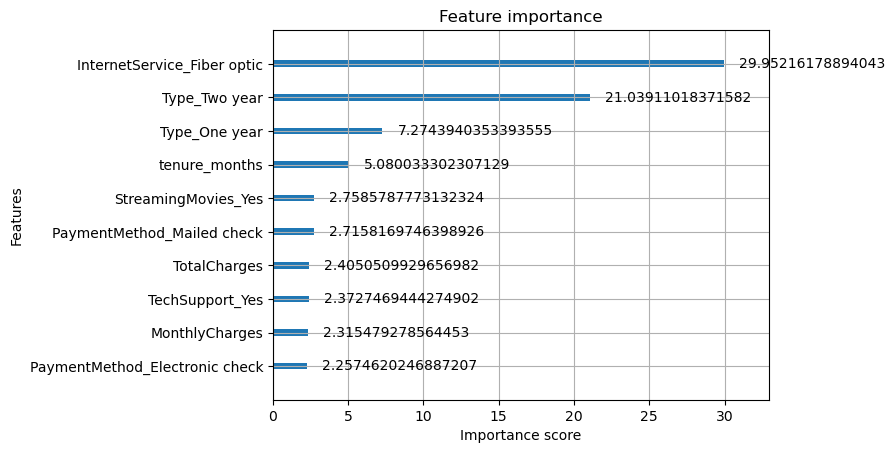

In [1126]:
importance = xgb_model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Gain'])
importance_df = importance_df.sort_values(by='Gain', ascending=False)

top_10_features = importance_df.head(10)
print("Top-10 Features by Gain:")
print(top_10_features)

xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=10)
plt.show()

# DEPLOYMENT

### Deployment de modelo y encapsulacion
Desarrollaremos una API REST utilizando Flask o FastAPI para encapsular el modelo XGBoost y permitir su consumo en tiempo real. Esta API se integrará directamente con el CRM de la empresa, lo que permitirá puntuar a los clientes de manera automatizada. Los puntos clave de activación incluirán ciclos de facturación, cambios de servicio e interacciones con el soporte al cliente. Dado que el modelo tiene un horizonte de 12 meses, configuraremos alertas tempranas para clientes que muestren riesgo de churn en los primeros meses, permitiendo intervenciones proactivas.

### Monitoreo de Deriva

Implementaremos un sistema de monitoreo continuo para detectar cambios en las distribuciones de las variables más importantes, como "InternetService_Fiber optic" (puntaje 29.95) y "Type_Two year" (puntaje 21.04), que son las características más influyentes según el modelo. Estableceremos umbrales de alerta cuando se detecte una deriva superior al 10% en estas variables. Además, realizaremos evaluaciones mensuales del rendimiento del modelo  utilizando datos etiquetados de churn actualizados. Esto es especialmente crítico dado el horizonte de 12 meses, ya que los patrones de churn pueden evolucionar gradualmente.

### Estrategia de los descuentos para churn 12meses
Basándonos en los insights del modelo, diseñaremos incentivos personalizados para los clientes de alto riesgo (percentil superior del 20% en puntuación de churn). Para los clientes con servicio de fibra óptica (la variable más importante), ofreceremos paquetes mejorados con soporte técnico incluido (TechSupport_Yes tiene un puntaje de 2.32). A los clientes con contratos mensuales les propondremos descuentos del 15-20% por comprometerse a un año o dos (aprovechando el alto peso de "Type_Two year"). También incluiremos beneficios complementarios como meses gratis de streaming (variable "StreamingMovies_Yes" con 2.72 de importancia) para aquellos identificados como usuarios frecuentes de este servicio.